In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import pydotplus
import matplotlib.image as mpimg
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import folium
import webbrowser
from folium import plugins
from imblearn.over_sampling import SMOTE

# Import the Dataset

In [2]:
df_full = pd.read_csv(r"C:\Users\ASUS\Downloads\Data-Collisions.csv")
df_full

C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N


In [3]:
df_full.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [4]:
#create a new dataframe with the required attributes
df = df_full[['SEVERITYCODE','SEVERITYDESC', 'ADDRTYPE', 'INCDATE','INCDTTM', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND','SPEEDING', 'HITPARKEDCAR']]

df_map = df_full[['SEVERITYCODE','ADDRTYPE','X', 'Y']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    194673 non-null  int64 
 1   SEVERITYDESC    194673 non-null  object
 2   ADDRTYPE        192747 non-null  object
 3   INCDATE         194673 non-null  object
 4   INCDTTM         194673 non-null  object
 5   JUNCTIONTYPE    188344 non-null  object
 6   INATTENTIONIND  29805 non-null   object
 7   UNDERINFL       189789 non-null  object
 8   WEATHER         189592 non-null  object
 9   ROADCOND        189661 non-null  object
 10  LIGHTCOND       189503 non-null  object
 11  SPEEDING        9333 non-null    object
 12  HITPARKEDCAR    194673 non-null  object
dtypes: int64(1), object(12)
memory usage: 19.3+ MB


In [6]:
df.describe()

,SEVERITYCODE
count,194673.000000
mean,1.298901
std,0.457778
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


# Identify and Fill the Missing Values

Convert "?" to NaN In the car dataset, missing data comes with the question mark "?" and replace "?" with NaN

In [7]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [8]:
df

,SEVERITYCODE,SEVERITYDESC,ADDRTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,2,Injury Collision,Intersection,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,N
1,1,Property Damage Only Collision,Block,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,N
2,1,Property Damage Only Collision,Block,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,N
3,1,Property Damage Only Collision,Block,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,N
4,2,Injury Collision,Intersection,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,Injury Collision,Block,2018/11/12 00:00:00+00,11/12/2018 8:12:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,N
194669,1,Property Damage Only Collision,Block,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,Mid-Block (not related to intersection),Y,N,Raining,Wet,Daylight,NaN,N
194670,2,Injury Collision,Intersection,2019/01/19 00:00:00+00,1/19/2019 9:25:00 AM,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN,N
194671,2,Injury Collision,Intersection,2019/01/15 00:00:00+00,1/15/2019 4:48:00 PM,At Intersection (intersection related),NaN,N,Clear,Dry,Dusk,NaN,N


In [9]:
# Evaluating for Missing Data
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("_____________________________________________")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64
_____________________________________________
SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64
_____________________________________________
ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64
_____________________________________________
INCDATE
False    194673
Name: INCDATE, dtype: int64
_____________________________________________
INCDTTM
False    194673
Name: INCDTTM, dtype: int64
_____________________________________________
JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64
_____________________________________________
INATTENTIONIND
True     164868
False     29805
Name: INATTENTIONIND, dtype: int64
_____________________________________________
UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64
_____________________________________________
WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64
__________________________________

# Replace missing value by the most frequency

In [10]:
df["ADDRTYPE"].replace(np.nan, df['ADDRTYPE'].value_counts().idxmax(), inplace=True)
df['ADDRTYPE'].value_counts()

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Block           128852
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [11]:
df["JUNCTIONTYPE"].replace(np.nan, df['JUNCTIONTYPE'].value_counts().idxmax(), inplace=True)
df["JUNCTIONTYPE"].replace("Unknown", df['JUNCTIONTYPE'].value_counts().idxmax(), inplace=True)
df["JUNCTIONTYPE"].replace("Ramp Junction", 'RampDriveway', inplace=True)
df["JUNCTIONTYPE"].replace("Driveway Junction", 'RampDriveway', inplace=True)
df["JUNCTIONTYPE"].replace("At Intersection (intersection related)", 'At-Intersection', inplace=True)
df["JUNCTIONTYPE"].replace("At Intersection (but not related to intersection)", 'At-Intersection', inplace=True)
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)    96138
At-Intersection                            64908
Mid-Block (but intersection related)       22790
RampDriveway                               10837
Name: JUNCTIONTYPE, dtype: int64

In [12]:
df["UNDERINFL"].replace(np.nan, df['UNDERINFL'].value_counts().idxmax(), inplace=True)
df['UNDERINFL'] = df['UNDERINFL'].map({'N': 0, '0': 0, 'Y': 1, '1': 1})
"""
df["UNDERINFL"].replace("0", "N", inplace=True)
df["UNDERINFL"].replace("1", "Y", inplace=True)
"""
df['UNDERINFL'].value_counts()

<ipython-input-12-7389896fe652>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UNDERINFL'] = df['UNDERINFL'].map({'N': 0, '0': 0, 'Y': 1, '1': 1})


0    185552
1      9121
Name: UNDERINFL, dtype: int64

In [13]:
df["WEATHER"].replace(np.nan, df['WEATHER'].value_counts().idxmax(), inplace=True)
df["WEATHER"].replace("Other","Unknown",inplace=True)
df["WEATHER"].replace("Partly Cloudy","Overcast",inplace=True)
df["WEATHER"].replace("Raining","RainSnow",inplace=True)
df["WEATHER"].replace("Snowing","RainSnow",inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain","RainSnow",inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke","RainSnow",inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt","RainSnow",inplace=True)
df["WEATHER"].replace("Severe Crosswind","RainSnow",inplace=True)
df['WEATHER'].value_counts()

Clear       116216
RainSnow     34815
Overcast     27719
Unknown      15923
Name: WEATHER, dtype: int64

In [14]:
df["ROADCOND"].replace(np.nan, df['ROADCOND'].value_counts().idxmax(), inplace=True)
df["ROADCOND"].replace("Ice", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Standing Water", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Oil", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Snow/Slush", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", "IceOilWaterSnow", inplace=True)
df['ROADCOND'].value_counts()

Dry                129522
Wet                 47474
Unknown             15210
IceOilWaterSnow      2467
Name: ROADCOND, dtype: int64

In [15]:
df["LIGHTCOND"].replace(np.nan, df['LIGHTCOND'].value_counts().idxmax(), inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", "Dark-With-Light", inplace=True)
df["LIGHTCOND"].replace("Other", "Unknown", inplace=True)
df["LIGHTCOND"].replace("Dusk", "DuskDawn", inplace=True)
df["LIGHTCOND"].replace("Dawn", "DuskDawn", inplace=True)
df['LIGHTCOND'].value_counts()

Daylight           121307
Dark-With-Light     48507
Unknown             13708
DuskDawn             8404
Dark-No-Light        2747
Name: LIGHTCOND, dtype: int64

In [16]:
# only has Y, so all the other value should be N
df["INATTENTIONIND"].replace(np.nan, "N", inplace=True)
df["INATTENTIONIND"].describe()

count     194673
unique         2
top            N
freq      164868
Name: INATTENTIONIND, dtype: object

In [17]:
df["SPEEDING"].replace(np.nan, "N", inplace=True)
df["SPEEDING"].describe()

count     194673
unique         2
top            N
freq      185340
Name: SPEEDING, dtype: object

In [18]:
df["SEVERITYDESC"].describe()

count                             194673
unique                                 2
top       Property Damage Only Collision
freq                              136485
Name: SEVERITYDESC, dtype: object

In [19]:
df

,SEVERITYCODE,SEVERITYDESC,ADDRTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,2,Injury Collision,Intersection,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At-Intersection,N,0,Overcast,Wet,Daylight,N,N
1,1,Property Damage Only Collision,Block,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),N,0,RainSnow,Wet,Dark-With-Light,N,N
2,1,Property Damage Only Collision,Block,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),N,0,Overcast,Dry,Daylight,N,N
3,1,Property Damage Only Collision,Block,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),N,0,Clear,Dry,Daylight,N,N
4,2,Injury Collision,Intersection,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At-Intersection,N,0,RainSnow,Wet,Daylight,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,Injury Collision,Block,2018/11/12 00:00:00+00,11/12/2018 8:12:00 AM,Mid-Block (not related to intersection),N,0,Clear,Dry,Daylight,N,N
194669,1,Property Damage Only Collision,Block,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,Mid-Block (not related to intersection),Y,0,RainSnow,Wet,Daylight,N,N
194670,2,Injury Collision,Intersection,2019/01/19 00:00:00+00,1/19/2019 9:25:00 AM,At-Intersection,N,0,Clear,Dry,Daylight,N,N
194671,2,Injury Collision,Intersection,2019/01/15 00:00:00+00,1/15/2019 4:48:00 PM,At-Intersection,N,0,Clear,Dry,DuskDawn,N,N


In [20]:
#drop whole row with NaN in "X" and "Y" column
df_map.dropna(subset=["X"], axis=0, inplace=True)
df_map.shape

<ipython-input-20-2c98db7fae6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_map.dropna(subset=["X"], axis=0, inplace=True)


(189339, 4)

In [21]:
### Convert to date time object
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['INCDATE'] = pd.to_datetime(df['INCDATE'])

<ipython-input-21-12ceea3da6b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
<ipython-input-21-12ceea3da6b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INCDATE'] = pd.to_datetime(df['INCDATE'])


In [22]:
# covert datetime to weekday and hours
df['hourofday'] = df['INCDTTM'].dt.hour
df['dayofweek'] = df['INCDTTM'].dt.dayofweek
df.head()

<ipython-input-22-296483ab81dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hourofday'] = df['INCDTTM'].dt.hour
<ipython-input-22-296483ab81dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df['INCDTTM'].dt.dayofweek


,SEVERITYCODE,SEVERITYDESC,ADDRTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,hourofday,dayofweek
0,2,Injury Collision,Intersection,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At-Intersection,N,0,Overcast,Wet,Daylight,N,N,14,2
1,1,Property Damage Only Collision,Block,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),N,0,RainSnow,Wet,Dark-With-Light,N,N,18,2
2,1,Property Damage Only Collision,Block,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),N,0,Overcast,Dry,Daylight,N,N,10,3
3,1,Property Damage Only Collision,Block,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),N,0,Clear,Dry,Daylight,N,N,9,4
4,2,Injury Collision,Intersection,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At-Intersection,N,0,RainSnow,Wet,Daylight,N,N,8,2


# Data Normalization

Transforming values of several variables into a similar range.

## Binning

Transforming continuous numerical variables into discrete categorical "bins" for grouped analysis.

In [23]:
bins = np.linspace(min(df_map["X"]), max(df_map["X"]), 4)
group_names = ['Low', 'Medium', 'High']
df_map['X-binned'] = pd.cut(df_map['X'], bins, labels=group_names, include_lowest=True )
df_map[['X','X-binned']].head(10)

<ipython-input-23-e9c464f22b09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_map['X-binned'] = pd.cut(df_map['X'], bins, labels=group_names, include_lowest=True )


,X,X-binned
0,-122.323148,Medium
1,-122.347294,Medium
2,-122.334540,Medium
3,-122.334803,Medium
4,-122.306426,Medium
5,-122.387598,Low
6,-122.338485,Medium
7,-122.320780,Medium
8,-122.335930,Medium
9,-122.384700,Low


In [24]:
#Indicator variable
dummy_variable_1 = pd.get_dummies(df_map["ADDRTYPE"])
dummy_variable_1.rename(columns={'Block':'AddType-Block', 'Intersection':'AddType-Intersection'}, inplace=True)
dummy_variable_1.head()

,AddType-Block,AddType-Intersection
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [25]:
# drop original column "fuel-type" from "df"
# df.drop("fuel-type", axis = 1, inplace=True)
# merge data frame "df" and "dummy_variable_1" 
df_map = pd.concat([df_map, dummy_variable_1], axis=1)
df_map.head(10)

,SEVERITYCODE,ADDRTYPE,X,Y,X-binned,AddType-Block,AddType-Intersection
0,2,Intersection,-122.323148,47.703140,Medium,0,1
1,1,Block,-122.347294,47.647172,Medium,1,0
2,1,Block,-122.334540,47.607871,Medium,1,0
3,1,Block,-122.334803,47.604803,Medium,1,0
4,2,Intersection,-122.306426,47.545739,Medium,0,1
5,1,Intersection,-122.387598,47.690575,Low,0,1
6,1,Intersection,-122.338485,47.618534,Medium,0,1
7,2,Intersection,-122.320780,47.614076,Medium,0,1
8,1,Block,-122.335930,47.611904,Medium,1,0
9,2,Intersection,-122.384700,47.528475,Low,0,1


# Data Visualization :

## Car Collisions at Each Type of Address Mentioned

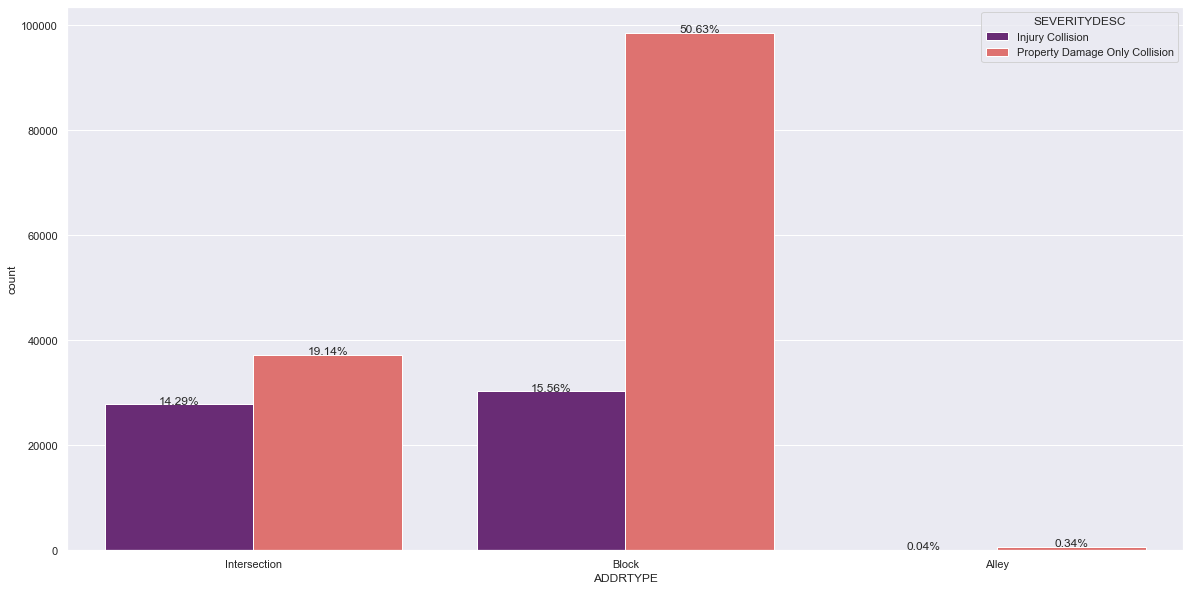

In [26]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
total = float(len(df))
ax = sns.countplot(x="ADDRTYPE", hue="SEVERITYDESC",palette="magma",data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2%}'.format(height/total),
            ha="center") 
show()

## Car Collisions by Day of Week (Monday-Sunday is 0-6)

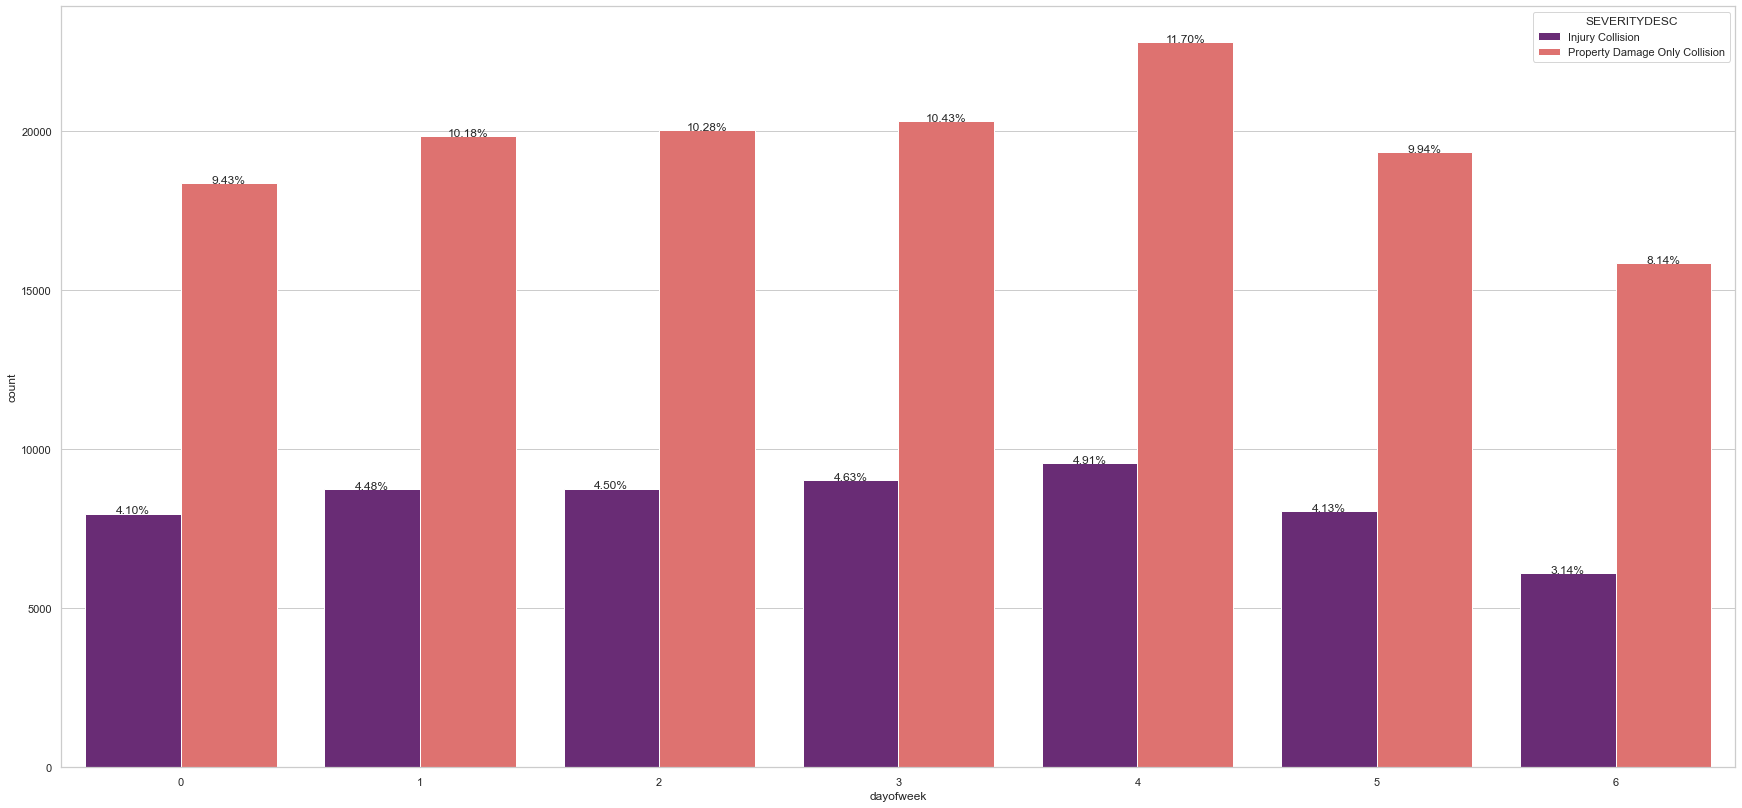

In [27]:
plt.figure(figsize=(30,14))
sns.set(style="whitegrid")
total = float(len(df)) 
ax = sns.countplot(x="dayofweek", hue="SEVERITYDESC",palette="magma", data=df) 

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

## Car Collisions by Hour of the Day

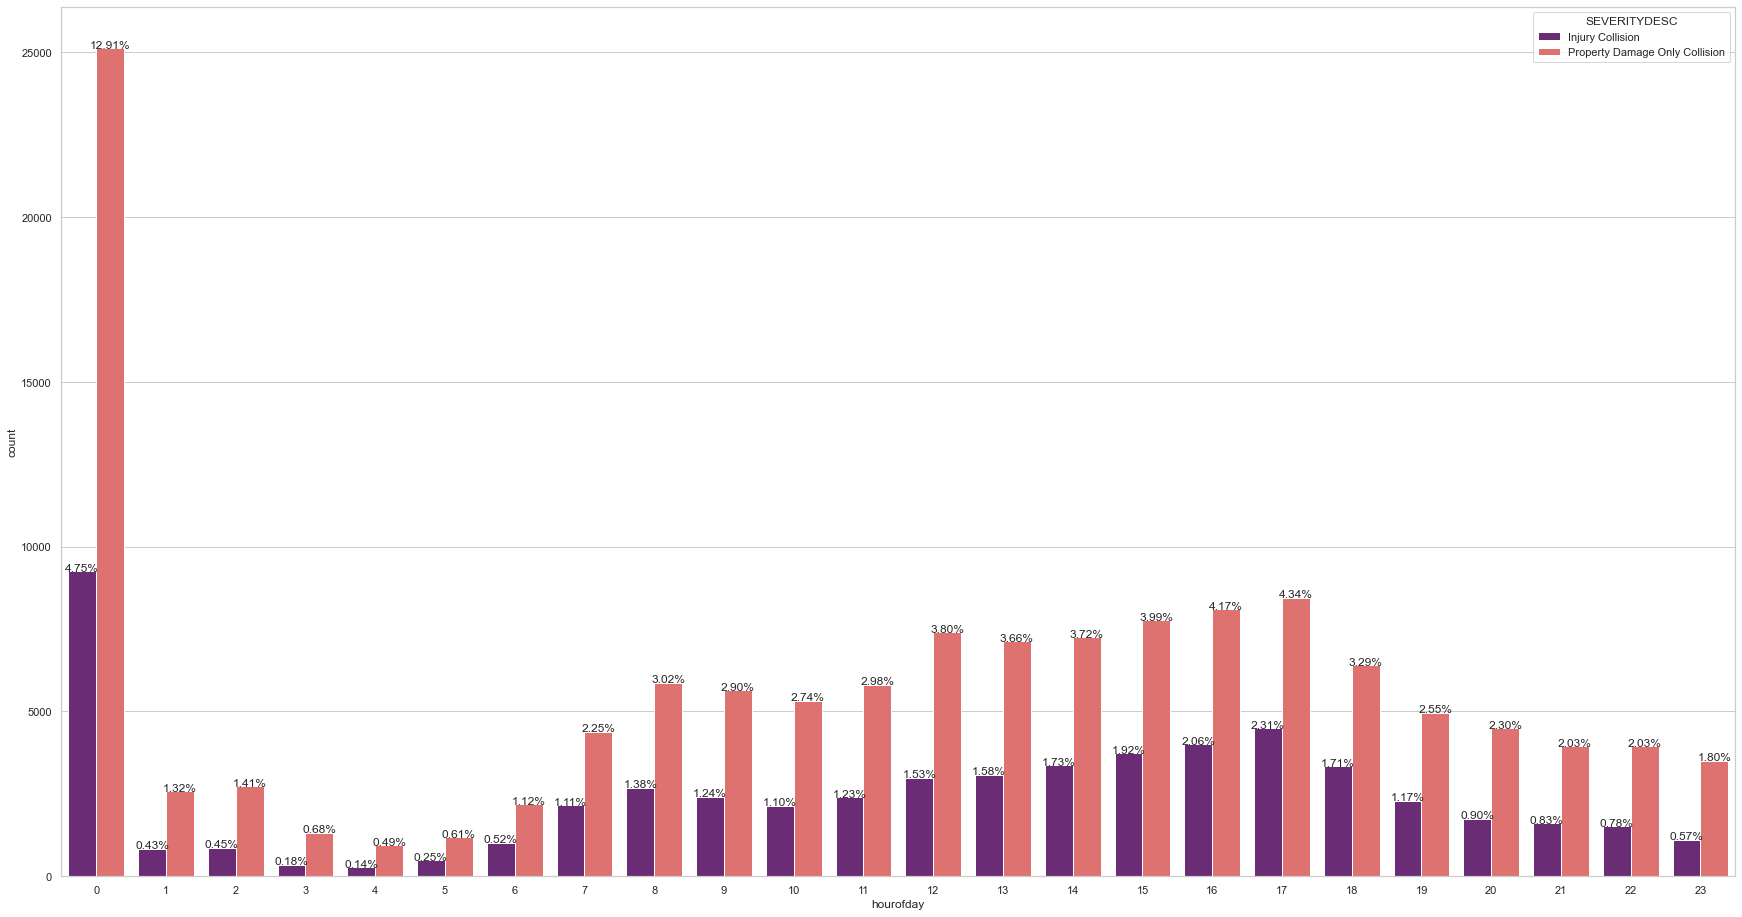

In [29]:
plt.figure(figsize=(30,16))
sns.set(style="whitegrid")
total = float(len(df))
ax = sns.countplot(x="hourofday", hue="SEVERITYDESC",palette="magma",data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

## When Driver was under the Influence of Drugs or Alcohol (0 is No, 1 is Yes)

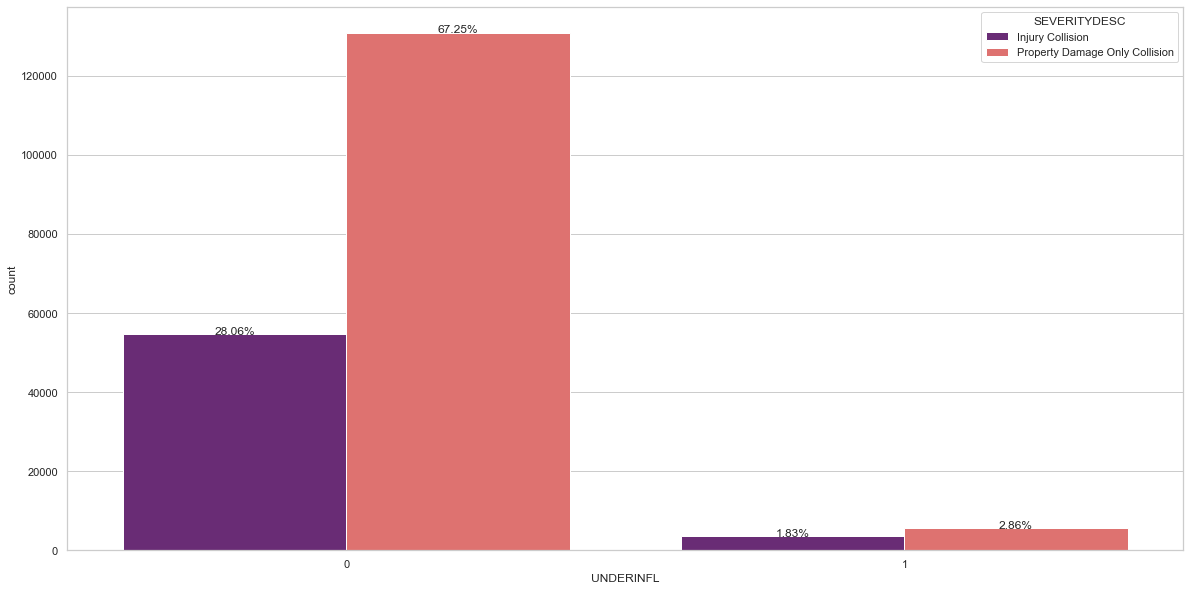

In [30]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
total = float(len(df))
ax = sns.countplot(x="UNDERINFL", hue="SEVERITYDESC",palette="magma",data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

## Car Collisions by Weather Conditions

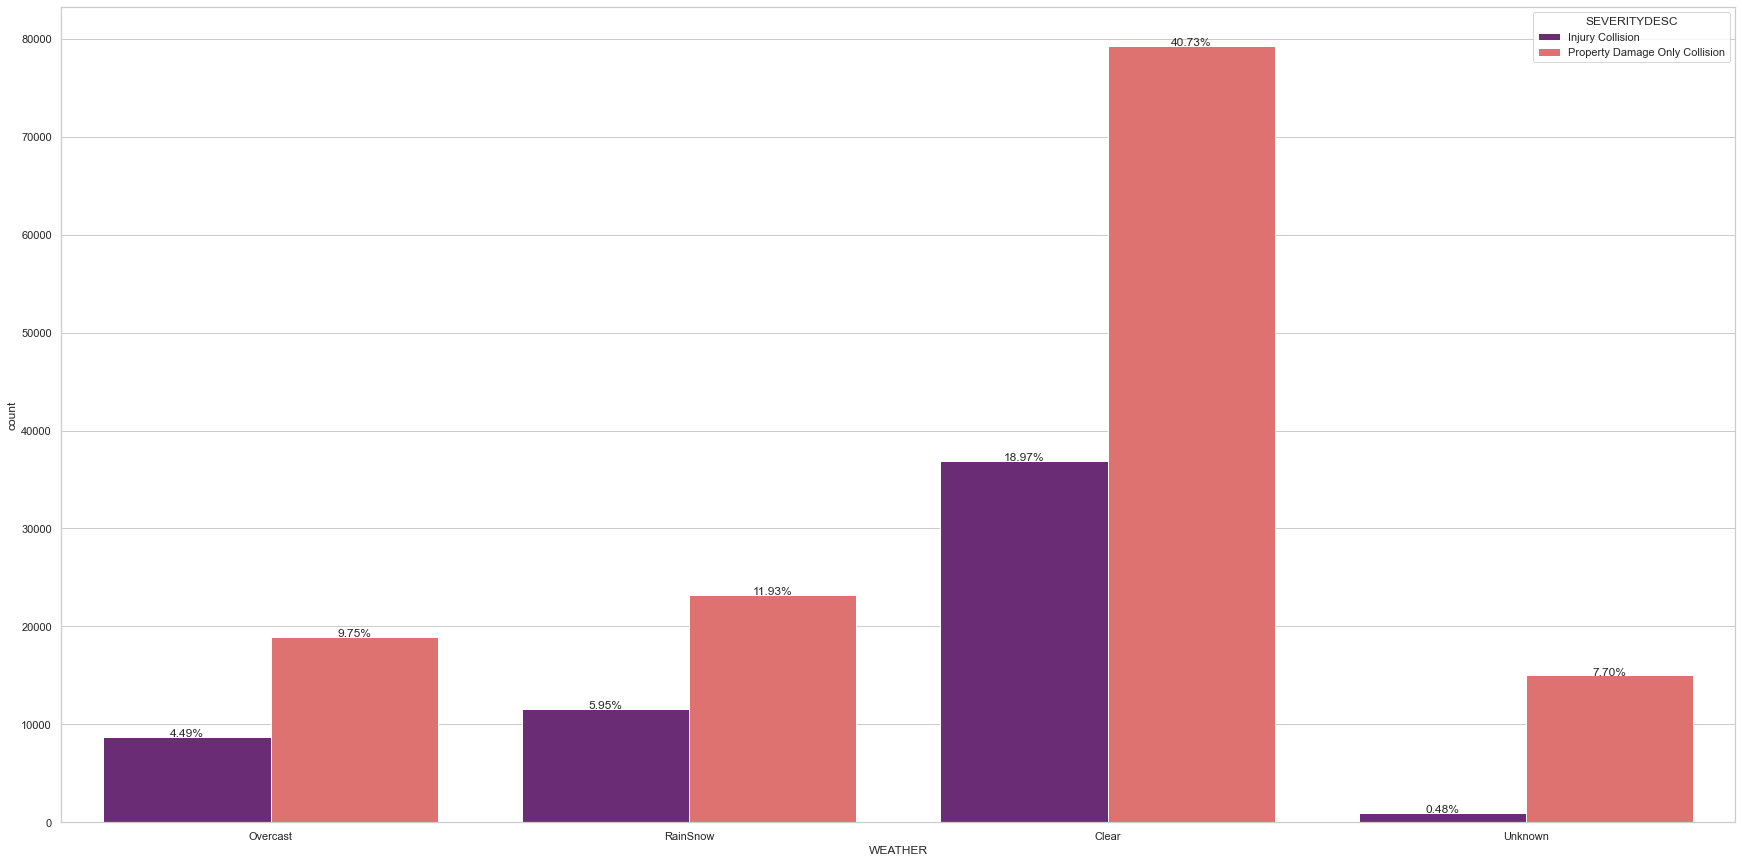

In [31]:
plt.figure(figsize=(30,15))
sns.set(style="whitegrid")
total = float(len(df))
ax = sns.countplot(x="WEATHER", hue="SEVERITYDESC",palette="magma",data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

## Car Collisions by Road Conditions

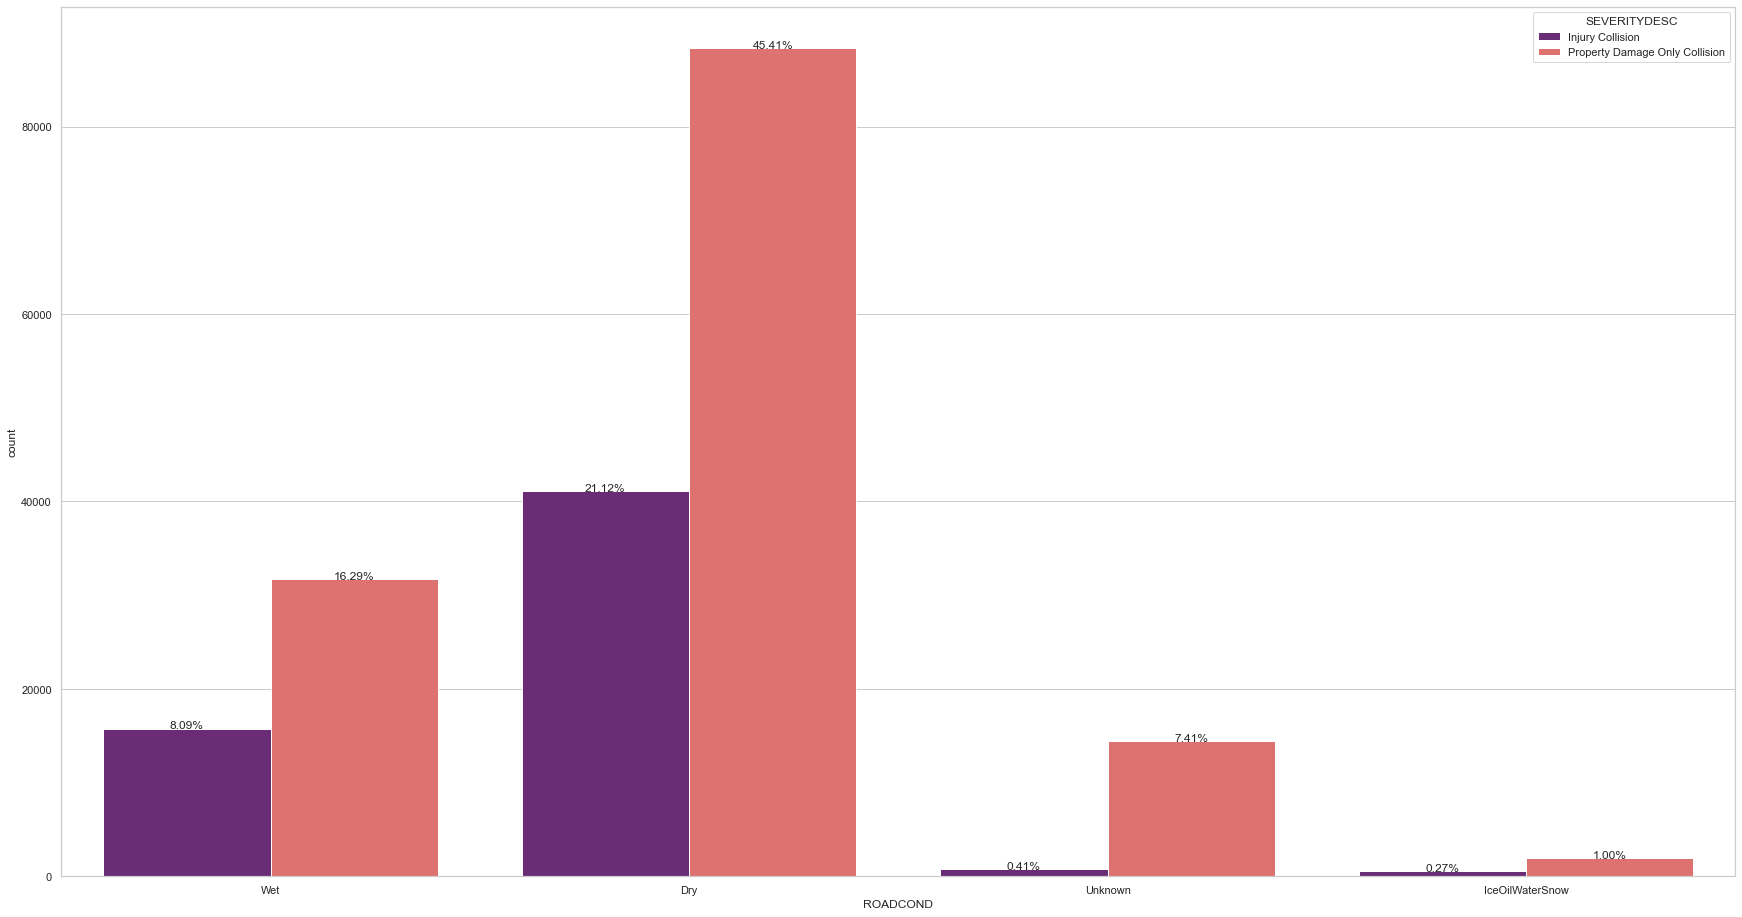

In [32]:
plt.figure(figsize=(30,16))
sns.set(style="whitegrid")

total = float(len(df))
ax = sns.countplot(x="ROADCOND", hue="SEVERITYDESC",palette="magma",data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

## Car Collisions by Light Conditions

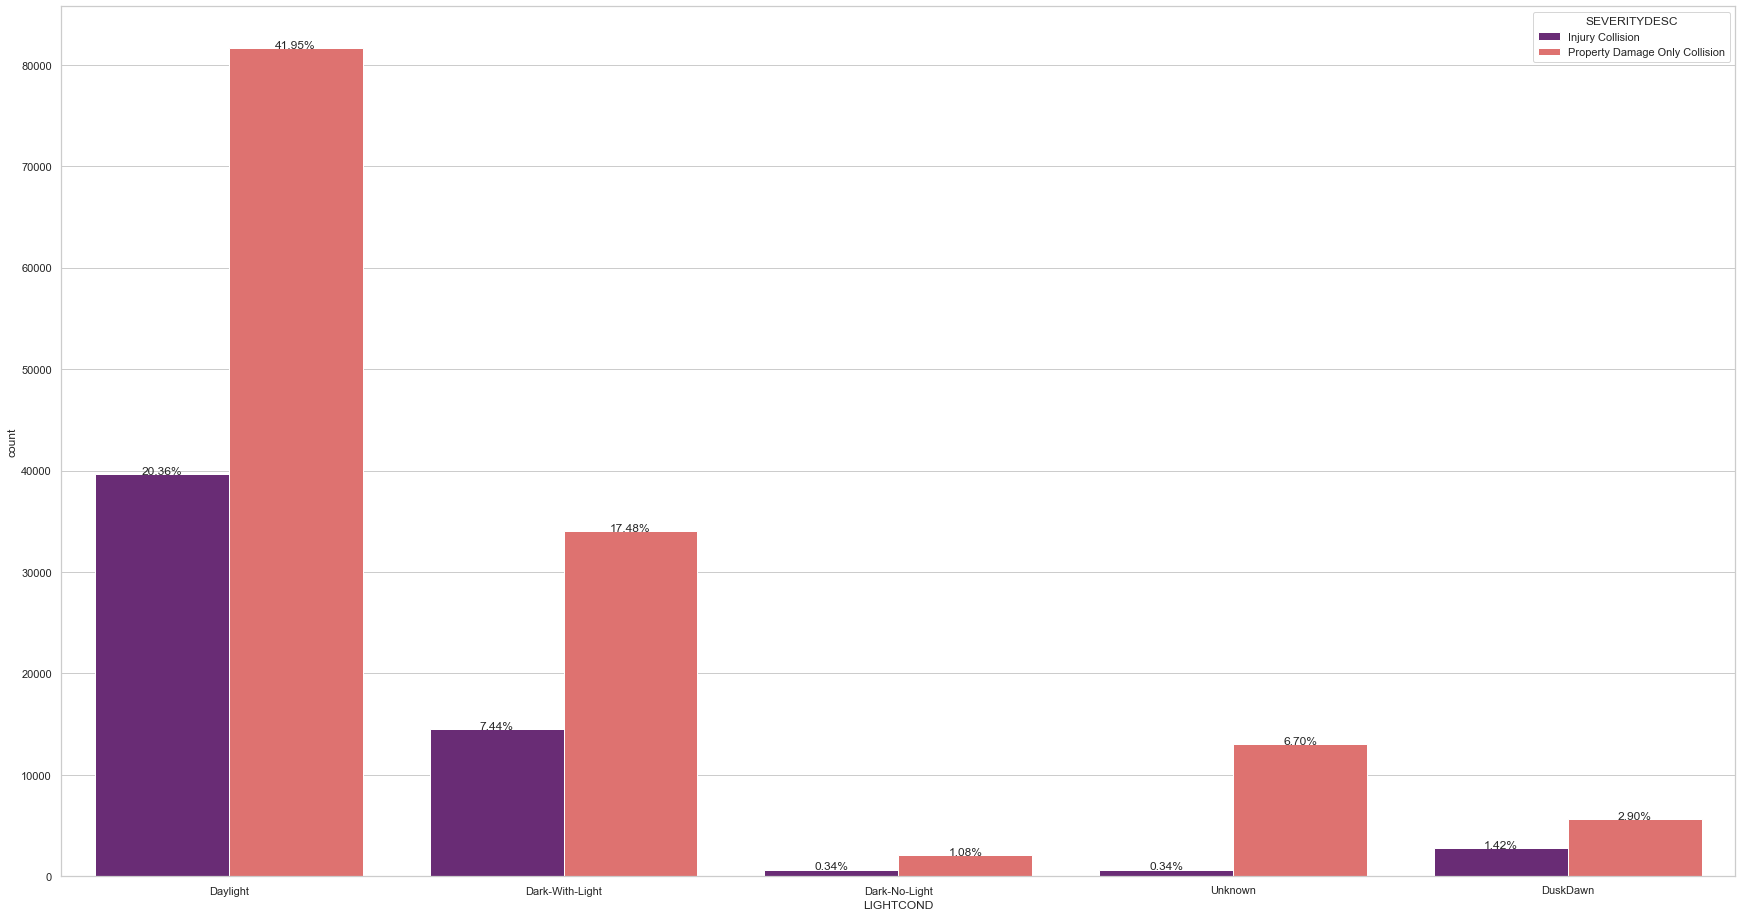

In [33]:
plt.figure(figsize=(30,16))
sns.set(style="whitegrid")
total = float(len(df))
ax = sns.countplot(x="LIGHTCOND", hue="SEVERITYDESC",palette="magma",data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

## Car Collisions when Speeding or Not

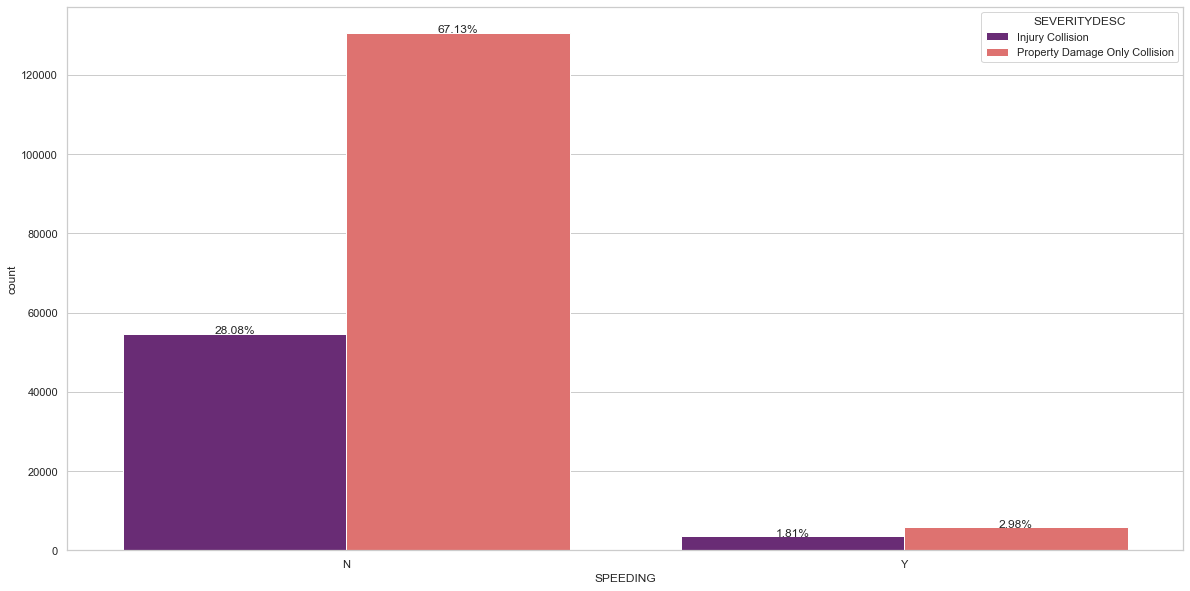

In [34]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
total = float(len(df))
ax = sns.countplot(x="SPEEDING", hue="SEVERITYDESC",palette="magma",data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

# Model Pre-Processing

In [35]:
y = df["SEVERITYCODE"]

In [36]:
#convert these features to numerical values
Feature = df[['ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'RiskTime','weekend']]
X = Feature.values
X[0:10]

KeyError: "['RiskTime'] not in index"

In [ ]:
df['weekend'].value_counts()

# Convert Categorical features to Numerical values

In [ ]:
#Categorical boolean mask
categorical_feature_mask = Feature.dtypes==object
categorical_feature_mask

In [ ]:
#filter categorical columns
categorical_cols = Feature.columns[categorical_feature_mask].tolist()
categorical_cols

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
Feature[categorical_cols] = Feature[categorical_cols].apply(lambda col: le.fit_transform(col))
Feature[categorical_cols].head(10)

In [ ]:
X = Feature.values
X[0:5]

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split
X_train_raw, X_test, y_train_raw, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train_raw.shape,  y_train_raw.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
# Balance the Data using SMOTE method
import imblearn
from imblearn.over_sampling import SMOTE

os = SMOTE (random_state=0)
X_train, y_train = os.fit_sample(X_train_raw, y_train_raw)
print('Train set:', X_train.shape,  y_train.shape)

In [ ]:
print("----------Sample % before SMOTE--------------")
print(y_train_raw.value_counts()/len(y_train_raw))
print("----------Sample % After SMOTE --------------")
print(pd.Series(y_train).value_counts()/len(y_train))

# Classification Techniques :

# K Nearest Neighbor (KNN)

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Find the best K between 1 and 10
grid_params = {'n_neighbors': [i for i in range(1, 10)]}
grid = GridSearchCV(KNeighborsClassifier(),grid_params,cv = 5)
grid_results = grid.fit(X_train, y_train)

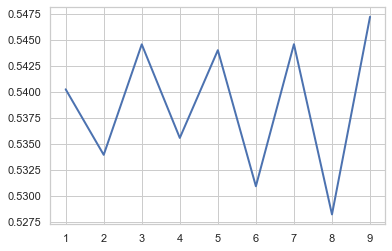

In [112]:
# visualization of the result of finding the best K value
sns.set_style("whitegrid")
sns.lineplot(grid_params['n_neighbors'], grid_results.cv_results_['mean_test_score'], palette="husl", linewidth=2)

In [76]:
print("The best n_neighbors was  : ", grid_results.best_params_['n_neighbors'])
print("The best accuracy was with:", grid_results.best_score_.round(2))

The best n_neighbors was  :  9
The best accuracy was with: 0.55


In [77]:
# using the best K = 5 to build model
#neigh = KNeighborsClassifier(n_neighbors = grid_results.best_params_.get('n_neighbors')).fit(X_train,y_train)
neigh = KNeighborsClassifier(n_neighbors = 6).fit(X_train,y_train)
yhat_train = neigh.predict(X_train)

In [78]:
print("KNN Accuracy     : {:.2f}".format(metrics.accuracy_score(y_train, yhat_train)))
print("KNN Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, yhat_train)))
print("KNN F1-score     : {:.2f}".format(metrics.f1_score(y_train, yhat_train, average='weighted')))

KNN Accuracy     : 0.55
KNN Jaccard index: 0.48
KNN F1-score     : 0.51


## Train Data Confusion Matrix

[[67706 14173]
 [59244 22635]]
              precision    recall  f1-score   support

           1       0.53      0.83      0.65     81879
           2       0.61      0.28      0.38     81879

    accuracy                           0.55    163758
   macro avg       0.57      0.55      0.51    163758
weighted avg       0.57      0.55      0.51    163758



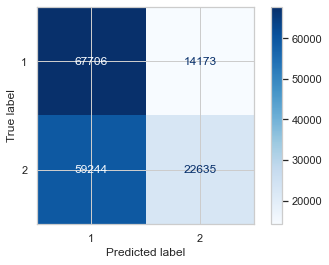

In [136]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, yhat_train))
print(classification_report(y_train, yhat_train))

plot_confusion_matrix(neigh, X_train, y_train, include_values=True,cmap=plt.cm.Blues)
plt.show()

## Test dataset Confusion matrix

[[44801  9805]
 [17247  6017]]
              precision    recall  f1-score   support

           1       0.72      0.82      0.77     54606
           2       0.38      0.26      0.31     23264

    accuracy                           0.65     77870
   macro avg       0.55      0.54      0.54     77870
weighted avg       0.62      0.65      0.63     77870



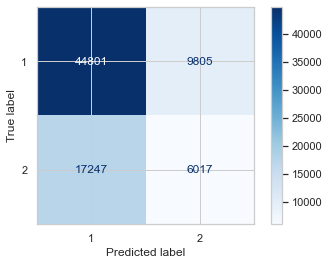

In [133]:
yhat_test = neigh.predict(X_test)

print(confusion_matrix(y_test, yhat_test))
print(classification_report(y_test, yhat_test))

plot_confusion_matrix(neigh, X_test, y_test, include_values=True,cmap=plt.cm.Blues)
plt.show()

# Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# find the best parameter
grid_params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
LR_grid = GridSearchCV(LogisticRegression(),grid_params,cv=3)
LR_grid.fit(X_train,y_train)

print("The best parameter was: ",LR_grid.best_params_)
print("The best accuracy was : ",LR_grid.best_score_)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_valida

The best parameter was:  {'C': 0.01, 'penalty': 'l2'}
The best accuracy was :  0.6142661732556577


In [83]:
# best parameter to build model
LR = LogisticRegression(C=0.01, solver='liblinear',penalty='l2').fit(X,y)
yhat_train_LR = LR.predict(X_train)
yhat_train_LR_prob = LR.predict_proba(X_train)

In [84]:
print("LR Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, yhat_train_LR)))
print("LR F1-score     : {:.2f}".format(metrics.f1_score(y_train, yhat_train_LR, average='weighted')))
print("LR Log Loss     : {:.2f}".format(metrics.log_loss(y_train, yhat_train_LR_prob)))

LR Jaccard index: 0.50
LR F1-score     : 0.39
LR Log Loss     : 0.74


## Train Data Confusion Matrix

[[79350  2529]
 [77199  4680]]
              precision    recall  f1-score   support

           1       0.51      0.97      0.67     81879
           2       0.65      0.06      0.11     81879

    accuracy                           0.51    163758
   macro avg       0.58      0.51      0.39    163758
weighted avg       0.58      0.51      0.39    163758



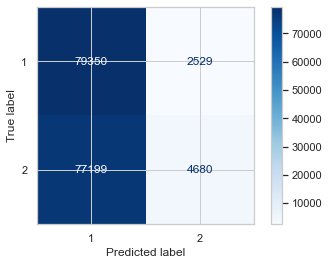

In [134]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, yhat_train_LR))
print(classification_report(y_train, yhat_train_LR))

plot_confusion_matrix(LR, X_train, y_train, include_values=True,cmap=plt.cm.Blues)
plt.show()

## Test Data Confusion Matrix

[[52922  1684]
 [21878  1386]]
              precision    recall  f1-score   support

           1       0.71      0.97      0.82     54606
           2       0.45      0.06      0.11     23264

    accuracy                           0.70     77870
   macro avg       0.58      0.51      0.46     77870
weighted avg       0.63      0.70      0.61     77870



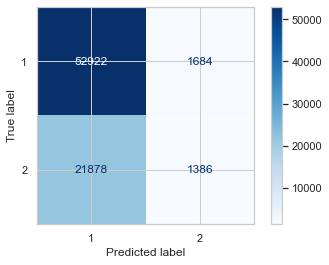

In [135]:
yhat_test_LR = LR.predict(X_test)

print(confusion_matrix(y_test, yhat_test_LR))
print(classification_report(y_test, yhat_test_LR))

plot_confusion_matrix(LR, X_test, y_test, include_values=True,cmap=plt.cm.Blues)
plt.show()